## Assignment 2

1)	Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Batting.CSV')

2)	Print out the dimensions and info about the dataframe you just created

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [31]:
df.shape

(102816, 25)

3)	How many players have hit 40 or more HRs in one single season? (Number only)

In [501]:
df1=df[['playerID','yearID','HR']].groupby(['playerID','yearID']).sum().reset_index()
df1[df1['HR']>=40]['playerID'].nunique()

142

4)	How many players have hit 600 or more HRs for their career? (Dataframe with name and player first and last name only and amount of HRs)

In [136]:
df1=df[['playerID','nameFirst','nameLast','HR']].groupby(['playerID']).agg({'HR':'sum','nameFirst':'first','nameLast':'first'})
df1[df1['HR']>=600]

,HR,nameFirst,nameLast
playerID,,,
aaronha01,755,Hank,Aaron
bondsba01,762,Barry,Bonds
griffke02,630,Ken,Griffey
mayswi01,660,Willie,Mays
rodrial01,696,Alex,Rodriguez
ruthba01,714,Babe,Ruth
sosasa01,609,Sammy,Sosa
thomeji01,612,Jim,Thome


5)	How many unique players have hit 40 2Bs or more, 10 3Bs or more, 200 Hits or more, and 30 HRs or more in one season? (Number Only)

In [500]:
df1=df[['playerID','2B','3B','H','HR','yearID']].groupby(['playerID','yearID']).sum().reset_index()
df1[(df1['2B']>=40)&(df1['3B']>=10)&(df1['H']>=200)&(df1['HR']>=30)]['playerID'].nunique()

11

6)	How many players seasons have had 100 or more SBs? (Dataframe, first name, last name, yearID, number of SBs, ordered from descending SBs )

In [171]:
df[['yearID','nameFirst','nameLast','SB']][df['SB']>=100].sort_values('SB',ascending=False)

,yearID,nameFirst,nameLast,SB
3667,1887,Hugh,Nicol,138.0
59616,1982,Rickey,Henderson,130.0
3617,1887,Arlie,Latham,129.0
51853,1974,Lou,Brock,118.0
3501,1887,Charlie,Comiskey,117.0
3764,1887,John,Ward,111.0
4278,1889,Billy,Hamilton,111.0
5232,1891,Billy,Hamilton,111.0
62410,1985,Vince,Coleman,110.0
64425,1987,Vince,Coleman,109.0


7)	How many players in the 1960s (yearID) have hit 200 or more HRs? (Dataframe, first name, last name, number of HRs, ordered descending by HR amt)

In [216]:
df1=df[(df['yearID']>=1960)&(df['yearID']<=1969)][['playerID','nameFirst','nameLast','HR']].groupby('playerID').agg({'HR':'sum','nameFirst':'first','nameLast':'first'})
df1[df1['HR']>=200].sort_values('HR',ascending=False)

,HR,nameFirst,nameLast
playerID,,,
killeha01,393,Harmon,Killebrew
aaronha01,375,Hank,Aaron
mayswi01,350,Willie,Mays
robinfr02,316,Frank,Robinson
mccovwi01,300,Willie,McCovey
howarfr01,288,Frank,Howard
cashno01,278,Norm,Cash
bankser01,269,Ernie,Banks
mantlmi01,256,Mickey,Mantle


8)	Who has hit the most HRs in history? (Dataframe, first name, last name, HRs)

In [219]:
df1=df[['playerID','nameFirst','nameLast','HR']].groupby(['playerID']).agg({'HR':'sum','nameFirst':'first','nameLast':'first'})
df1.sort_values('HR',ascending=False).head(1)

,HR,nameFirst,nameLast
playerID,,,
bondsba01,762,Barry,Bonds


9)	Who had the most hits (H) in the 1970s? (Dataframe)

In [241]:
df1=df[(df['yearID']>=1970)&(df['yearID']<=1979)][['playerID','nameFirst','nameLast','H']].groupby('playerID').agg({'H':'sum','nameFirst':'first','nameLast':'first'})
df1.sort_values('H',ascending=False).head(1)

,H,nameFirst,nameLast
playerID,,,
rosepe01,2045,Pete,Rose


10)	Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe, first name, last name, OBP, ordered descending by OBP)

In [173]:
df1=df[df['yearID']==1977].groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
df1['OBP'] = (df1['H'] + df1['BB']+df1['HBP'])/(df1['AB']+df1['BB']+df1['HBP']+df1['SF'])
df1['PA']=df1['AB']+df1['BB']+df1['HBP']+df1['SH']+df1['SF']
df1[df1['PA']>=500][['nameFirst','nameLast','OBP']].sort_values('OBP',ascending=False).head(5)

,nameFirst,nameLast,OBP
135,Rod,Carew,0.448773
745,Ken,Singleton,0.437788
752,Reggie,Smith,0.426910
334,Mike,Hargrove,0.420312
580,Joe,Morgan,0.417054


11)	Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe, first name, last name, average, descending by average)

In [498]:
df2=df[df['yearID']==2013].groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
df2['PA']=df2['AB']+df2['BB']+df2['HBP']+df2['SH']+df2['SF']
df2['BA']=df2['H']/df2['AB']
df2[df2['PA']>=300][['nameFirst','nameLast','BA']].sort_values('BA',ascending=False).head(8)

,nameFirst,nameLast,BA
167,Miguel,Cabrera,0.347748
980,Hanley,Ramirez,0.345395
269,Michael,Cuddyer,0.331288
759,Joe,Mauer,0.323596
1196,Mike,Trout,0.322581
595,Chris,Johnson,0.321012
398,Freddie,Freeman,0.319419
962,Yasiel,Puig,0.319372


12)	Leaders in hits from 1940 up to and including 1949. (Dataframe, first name, last name, number of hits)

 1. leader of each season from 1940 to 1949

In [5]:
df1=df[(df['yearID']>=1940)&(df['yearID']<=1949)].groupby(['yearID','playerID','nameFirst','nameLast']).sum().reset_index()
df1.loc[df1.groupby('yearID')['H'].idxmax()][['yearID','nameFirst','nameLast','H']]

,yearID,nameFirst,nameLast,H
84,1940,Doc,Cramer,200
1003,1941,Cecil,Travis,218
1424,1942,Johnny,Pesky,205
1909,1943,Stan,Musial,220
2560,1944,Snuffy,Stirnweiss,205
2868,1945,Tommy,Holmes,224
3599,1946,Stan,Musial,228
4192,1947,Johnny,Pesky,207
4700,1948,Stan,Musial,230
5233,1949,Stan,Musial,207


2. top 5 leaders of 1940-1949 period

In [175]:
df1=df[(df['yearID']>=1940)&(df['yearID']<=1949)].groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
df1[['yearID','nameFirst','nameLast','H']].sort_values('H',ascending=False).head(5)

,yearID,nameFirst,nameLast,H
138,19445,Lou,Boudreau,1578
427,19445,Bob,Elliott,1563
1576,19445,Dixie,Walker,1512
1103,15560,Stan,Musial,1432
390,17500,Bobby,Doerr,1407


13)	Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number of hits)

In [88]:
df1=df[(df['lgID']=='AL')|(df['lgID']=='NL')].groupby(['yearID','playerID','nameFirst','nameLast']).sum().reset_index()
df2=df1.loc[df1.groupby('yearID')['H'].idxmax()][['yearID','playerID','nameFirst','nameLast','H']]
df2['frequency'] = df2.groupby('playerID')['playerID'].transform('count')
df2[['yearID','nameFirst','nameLast','H','frequency']].sort_values('frequency',ascending=False).head(7)

,yearID,nameFirst,nameLast,H,frequency
7887,1909,Ty,Cobb,216,7
8907,1911,Ty,Cobb,248,7
9450,1912,Ty,Cobb,226,7
11158,1915,Ty,Cobb,208,7
7025,1907,Ty,Cobb,212,7
12190,1917,Ty,Cobb,225,7
13166,1919,Ty,Cobb,191,7


14) Which players have played the most games for their careers?  Top 5 first name, last name, descending by games played presented as a dataframe

In [503]:
df1=df.groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
df1[['nameFirst','nameLast','G']].sort_values('G',ascending=False).head(5)

,nameFirst,nameLast,G
14719,Pete,Rose,3562
18728,Carl,Yastrzemski,3308
1,Hank,Aaron,3298
7383,Rickey,Henderson,3081
3155,Ty,Cobb,3035


15)	How many players have had more 3000 or more hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [338]:
df2=df.groupby('playerID').agg({'H':'sum','HR':'sum'})
df2[(df2['H']>=3000)&(df2['HR']>=500)].shape[0]

5

16)	 How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [435]:
df[df['yearID']==1988][['HR']].sum()

HR    3180
dtype: int64

17)	 Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 or more ABs.  Dataframe, first name, last name, average, descending by average

In [345]:
df1=df
df1['BA']=df1['H']/df1['AB']
df1[(df1['nameFirst']=='Wade')&(df1['nameLast']=='Boggs')&(df1['AB']>=500)][['nameFirst','nameLast','BA']].sort_values('BA',ascending=False).head(3)

,nameFirst,nameLast,BA
62316,Wade,Boggs,0.367534
65391,Wade,Boggs,0.366438
64335,Wade,Boggs,0.362976


18)	 Please filter out the top 10 OBPs for the 1995 season with 400 or more PAs, sorted by OBP descending.  Dataframe with first name, last name, OBP

In [172]:
df1=df[df['yearID']==1995].groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
df1['OBP'] = (df1['H'] + df1['BB']+df1['HBP'])/(df1['AB']+df1['BB']+df1['HBP']+df1['SF'])
df1['PA']=df1['AB']+df1['BB']+df1['HBP']+df1['SH']+df1['SF']
df1[df1['PA']>=400][['nameFirst','nameLast','OBP']].sort_values('OBP',ascending=False).head(10)

,nameFirst,nameLast,OBP
628,Edgar,Martinez,0.478873
1002,Frank,Thomas,0.454405
659,Mark,McGwire,0.440758
1005,Jim,Thome,0.438061
107,Barry,Bonds,0.431496
894,Tim,Salmon,0.429467
235,Chili,Davis,0.429119
612,Dave,Magadan,0.427553
552,Chuck,Knoblauch,0.424483
715,Tim,Naehring,0.414729


19)	Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with first name, last name, number of 3Bs

In [505]:
df1=df[(df['yearID']==1922)|(df['yearID']==1925)|(df['yearID']==1926)|(df['yearID']==1928)].groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
df1[['nameFirst','nameLast','3B']].sort_values('3B',ascending=False).head(1)

,nameFirst,nameLast,3B
1011,Curt,Walker,59


20)	How many unique players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [506]:
df1=df.groupby(['playerID','yearID']).sum().reset_index()
len(set(df1[(df1['HR']>=30)&(df1['SB']>=30)]['playerID']))

38

21)	 Who had the highest OBP is 1986 with 400 or more ABs? (Dataframe first name, last name, OBP)

In [171]:
df1=df[(df['yearID']==1986)&(df['AB']>=400)].groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
df1['OBP'] = (df1['H'] + df1['BB']+df1['HBP'])/(df1['AB']+df1['BB']+df1['HBP']+df1['SF'])
df1[['nameFirst','nameLast','OBP']].sort_values('OBP',ascending=False).head(1)

,nameFirst,nameLast,OBP
11,Wade,Boggs,0.45283


22)	Same question but for 1997 and only in the NL (check league ID)? (Dataframe, first name, last name OBP)

In [170]:
df1=df[(df['yearID']==1997)&(df['lgID']=='NL')&(df['AB']>=400)].groupby(['playerID','nameFirst','nameLast']).sum().reset_index()
df1['OBP'] = (df1['H'] + df1['BB']+df1['HBP'])/(df1['AB']+df1['BB']+df1['HBP']+df1['SF'])
df1[['nameFirst','nameLast','OBP']].sort_values('OBP',ascending=False).head(1)

,nameFirst,nameLast,OBP
74,Larry,Walker,0.451807


23)	Who had more than the league average HRs (for players with 500 or more ABs) in 2012 (filter out all players with less 500 ABs)? (Dataframe first name, last name, HR descending)

In [167]:
df1=df[df['yearID']==2012].groupby(['lgID','playerID','nameFirst','nameLast']).sum().reset_index()
df2=df1[df1['AB']>=500][['lgID','playerID','nameFirst','nameLast','HR','AB']]
df2['avg'] = df2.groupby('lgID')['HR'].transform('mean')
df2['minus']=df2['HR']-df2['avg']
df2[df2['minus']>0][['playerID','nameFirst','nameLast','HR']].sort_values('HR',ascending=False)

,playerID,nameFirst,nameLast,HR
72,cabremi01,Miguel,Cabrera,44
219,grandcu01,Curtis,Granderson,43
231,hamiljo03,Josh,Hamilton,43
167,encared01,Edwin,Encarnacion,42
162,dunnad01,Adam,Dunn,41
698,braunry02,Ryan,Braun,41
43,beltrad01,Adrian,Beltre,36
616,willijo03,Josh,Willingham,35
707,bruceja01,Jay,Bruce,34
76,canoro01,Robinson,Cano,33


24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe, first name, last name, HRs, season)

In [35]:
df1=df.groupby(['yearID','playerID','nameFirst','nameLast','birthYear',]).sum().reset_index()
df1['age']=df1['yearID']-df1['birthYear']
df2=df1[df1['HR']>=50][['nameFirst','nameLast','HR','yearID','age']].sort_values('age',ascending=True).head(1)
df2[['nameFirst','nameLast','HR','yearID']]

,nameFirst,nameLast,HR,yearID
82621,Prince,Fielder,50,2007


25)	Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe, first name, last name, season they eclipsed more than 300 HRs)

BONUS:
1.Graph total HRs per season using bar graph

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

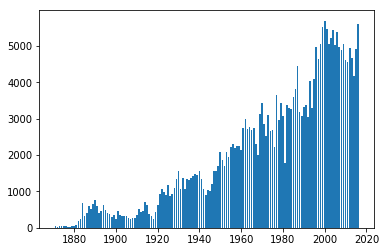

In [96]:
df1=df.groupby(['yearID'],as_index=False).sum()
df2=df1[['yearID','HR']]
x = df2['yearID']
y = df2['HR']
plt.bar(x, y)
plt.show()

2.Using a line graph please graph the average HRs per AB (think about this) per season

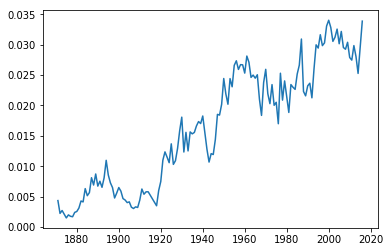

In [95]:
df1=df.groupby(['yearID'],as_index=False).sum()
df2['avg']=df1['HR']/df1['AB']
x=df2['yearID']
y=df2['avg']
plt.plot(x, y)
plt.show()